In [1]:
!pip install pandas numpy matplotlib statsmodels


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [3]:
# Generate synthetic time series data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=365, freq='D')  # 365 days, daily frequency
data = np.random.randn(365) * 10 + 100  # Random data around 100 with some noise

# Create a DataFrame
df = pd.DataFrame(data, columns=['Value'], index=dates)

# Display first few rows of the data
df.head()


,Value
2020-01-01,117.640523
2020-01-02,104.001572
2020-01-03,109.787380
2020-01-04,122.408932
2020-01-05,118.675580


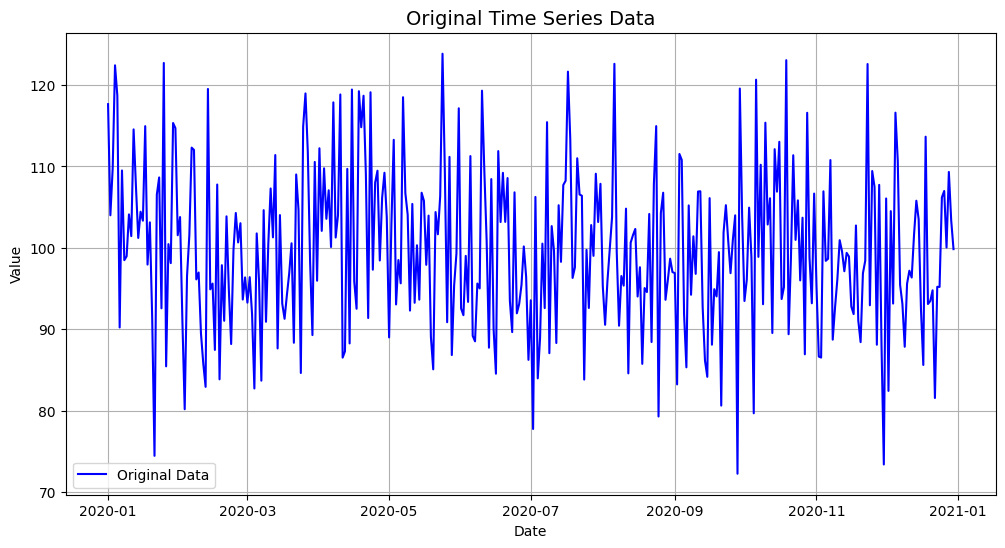

In [4]:
# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Original Data', color='blue')
plt.title('Original Time Series Data', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
# Perform Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

# Apply the ADF test on the 'Value' column
adf_test(df['Value'])


ADF Statistic: -19.725710494614585
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4484434475193777), '5%': np.float64(-2.869513170510808), '10%': np.float64(-2.571017574266393)}


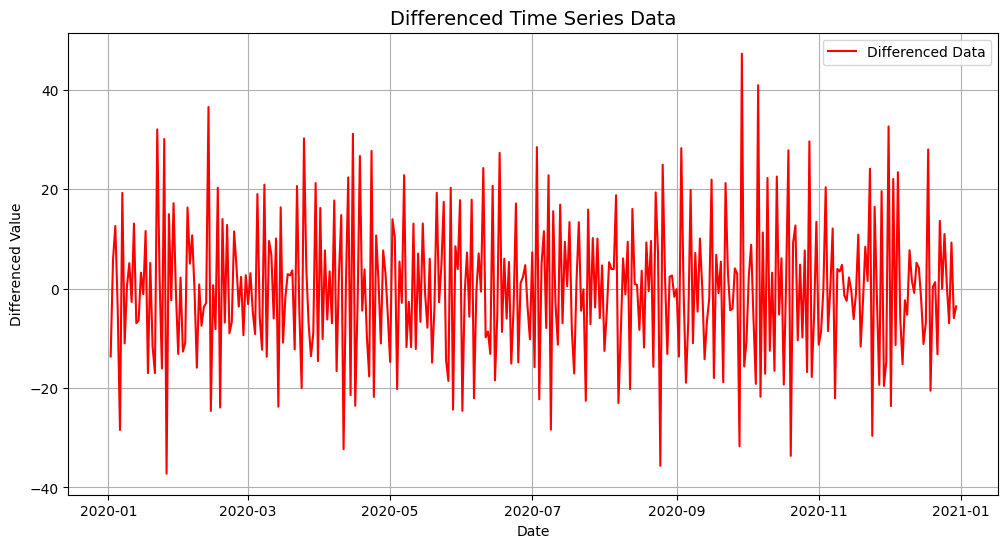

ADF Statistic: -9.410241617379418
p-value: 5.861807266147901e-16
Critical Values: {'1%': np.float64(-3.44911857009962), '5%': np.float64(-2.8698097654570507), '10%': np.float64(-2.5711757061225153)}


In [6]:
# Apply differencing
df['Value_diff'] = df['Value'].diff()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value_diff'], label='Differenced Data', color='red')
plt.title('Differenced Time Series Data', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.grid(True)
plt.legend()
plt.show()

# Perform the ADF test on differenced data
adf_test(df['Value_diff'].dropna())  # Drop NaN values after differencing
